In [37]:
import numpy as np
import matplotlib.pyplot as plt

Question 1: Perceptron implentation

In [38]:
def perceptron(points_matrix, tags_vector, weight_init=0):
    changed = True
    weight_vector = np.repeat(float(weight_init), points_matrix.shape[0])
    while changed:
        changed = False
        for idx, point in enumerate(points_matrix.T):
            if np.sign(weight_vector @ point) * tags_vector[idx] <= 0:
                weight_vector += tags_vector[idx] * point
                changed = True
    return weight_vector


In [39]:
def points_sign(point):
    if(point[0] - point[1] > 0):
        return 1
    else:
        return 0
    

In [40]:
def get_sample_data(n, P):
    points = np.random.uniform(low=-10, high=10, size=(n, P))
    tags = np.apply_along_axis(points_sign, axis=0, arr=points)
    return points, tags


In [41]:
points_matrix, tags = get_sample_data(n=2, P=1000)
data = np.row_stack((points_matrix, tags))
blues = data[:, data[2, :] == 1]
reds = data[:, data[2, :] == 0]

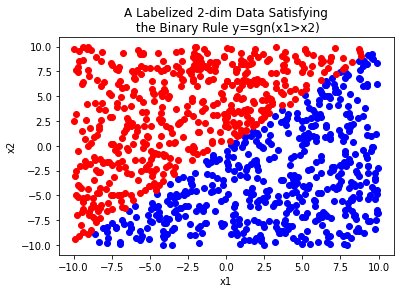

In [42]:
fig, ax = plt.subplots()
ax.scatter(blues[0,:],blues[1,:], c='blue', label = 'x1 > x2')
ax.scatter(reds[0,:],reds[1,:], c='red', label = 'x1 <= x2')
ax.title.set_text("Two dimentions of sign binary role")
ax.set_xlabel("x1")
ax.set_ylabel("x2")
# plt.legend()
plt.show()

In [45]:
weights = perceptron(points_matrix, tags, weight_init=1)


In [ ]:
sep_slope = -1/(weights[1]/weights[0])
x_base, y_base = (-10,-10)
y_of_x = (10-x_base)*sep_slope + y_base

In [ ]:
fig, ax = plt.subplots()
ax.scatter(blues[0,:],blues[1,:], c='blue', label = 'x1>x2')
ax.scatter(reds[0,:],reds[1,:], c='red', label = 'x1<x2')
ax.plot([0,(weights/5)[0]],[0,(weights/5)[1]],
        linewidth=3, c="black",label="w") # weights preserves its direction
ax.plot([x_base,10],[y_base,y_of_x], c="gold", linewidth=4, label="linear sep", linestyle="--")
ax.set_xlim(-11,11)
ax.set_ylim(-11,11)
ax.title.set_text("A Labelized 2-dim Data Satisfying\n the Binary Rule y=sgn(x1>x2)")
ax.set_xlabel("x1")
ax.set_ylabel("x2")
plt.legend()
plt.show()